In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


In [ ]:
train_dir = '/content/Pneumonia Project/Train'
val_dir = '/content/Pneumonia Project/Test'

# Image data generator with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Image data generator for validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1078 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size), # Ensure steps_per_epoch is at least 1
    validation_data=val_generator,
    validation_steps=max(1, val_generator.samples // val_generator.batch_size), # Ensure validation_steps is at least 1
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: -16769161.0000 - accuracy: 0.4359

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 18s 555ms/step - loss: -16769161.0000 - accuracy: 0.4359 - val_loss: -72691512.0000 - val_accuracy: 0.3571
Epoch 2/20
33/33 [==============================] - 17s 506ms/step - loss: -386741568.0000 - accuracy: 0.4293 - val_loss: -1166064384.0000 - val_accuracy: 0.3571
Epoch 3/20
33/33 [==============================] - 18s 522ms/step - loss: -3395430912.0000 - accuracy: 0.4331 - val_loss: -8204207104.0000 - val_accuracy: 0.3571
Epoch 4/20
33/33 [==============================] - 17s 506ms/step - loss: -17845538816.0000 - accuracy: 0.4340 - val_loss: -36490469376.0000 - val_accuracy: 0.3571
Epoch 5/20
33/33 [==============================] - 17s 509ms/step - loss: -65582612480.0000 - accuracy: 0.4302 - val_loss: -119936835584.0000 - val_accuracy: 0.3571
Epoch 6/20
33/33 [==============================] - 18s 537ms/step - loss: -188518187008.0000 - accuracy: 0.4340 - val_loss: -317654728704.0000 - val_accuracy: 0.3571
Epoch 7/20
33/33 [===========

In [ ]:
# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation accuracy: {val_acc:.4f}')


1/1 [==============================] - 0s 314ms/step - loss: -167829722628096.0000 - accuracy: 0.3571
Validation accuracy: 0.3571


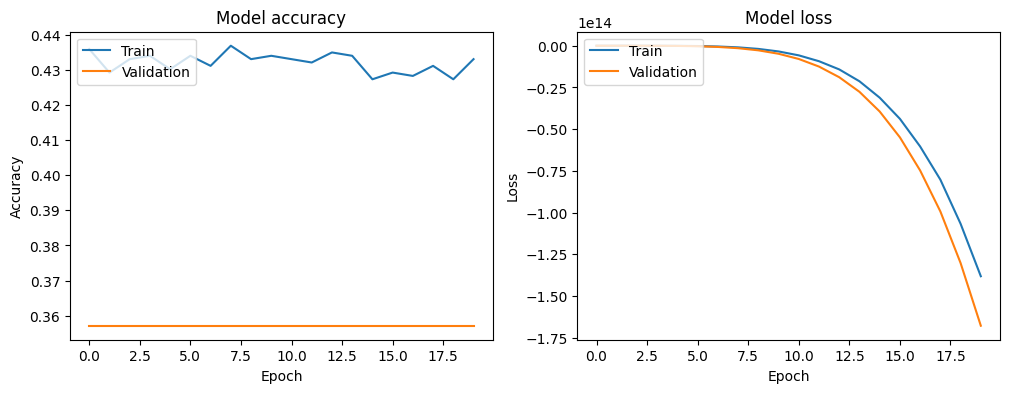

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


1/1 [==============================] - 0s 17ms/step


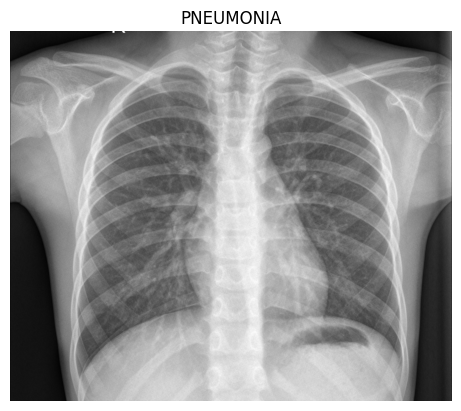

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def load_and_predict(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction
    prediction = model.predict(img_array)
    result = 'PNEUMONIA' if prediction[0] > 0.5 else 'NORMAL'

    # Display the image with the result
    plt.imshow(image.load_img(image_path))
    plt.title(result)
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/Pneumonia Project/Test/Pneumonia/person10_virus_35.jpeg'
load_and_predict(image_path)

